In [5]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
DEVICE = 'cuda:0'

## Torus model

In [7]:
def model(params, center = np.array([0.6, 0.8])):
    a, b, c = params['a'], params['b'], params['c']
    r = ((a-center[0])**2+(b-center[1])**2)**0.5  # Return radial distance from center
    x = np.array([a, r, c])
    return dict(x=x)

def noise(obs, params, noise = np.array([0.03, 0.005, 0.2])):
    x = obs['x']
    n = np.random.randn(*x.shape)*noise
    return dict(x = x + n)

par0 = dict(a=0.57, b=0.8, c=1.0)
obs0 = model(par0)  # Using Asimov data

In [8]:
cache = swyft.MemoryCache(params = ['a', 'b', 'c'], obs_shapes = dict(x=(3,)))

Creating new cache.


In [9]:
prior = swyft.Prior({"a": ["uniform", 0., 1.], "b": ["uniform",  0., 1.], "c": ["uniform", 0., 1.]})

## Inference

In [29]:
s = swyft.SWYFT(model, noise, prior, cache, obs0, device = DEVICE)
s.infer1d(Ninit = 5000, max_rounds = 10, train_args = dict(batch_size = 32), tail_args = dict(p=0.0, tail_features = False, n_tail_features=1, 
                                                                                              hidden_layers=[256,256,256]))

N = 5000
Round: 1
No new simulator runs required.
No simulations required.
n_features = 3
Start training
LR iteration 0
Validation loss: 2.355197779337565
Validation loss: 2.3647764603296917
Total epochs: 2
LR iteration 1
Validation loss: 2.1618905305862426
Validation loss: 2.132785669962565
Validation loss: 2.0903241793314615
Validation loss: 2.079786523183187
Validation loss: 2.0672600348790486
Validation loss: 2.0215564648310345
Validation loss: 2.089813709259033
Total epochs: 7
LR iteration 2
Validation loss: 2.0739813089370727
Validation loss: 2.0417659759521483
Validation loss: 2.0513858556747437
Total epochs: 3
Volume shrinkage: 0.08771581058791805
N = 5219
Round: 2


Simulate:   0%|          | 0/1619 [00:00<?, ?it/s]

Adding 1619 new samples. Run simulator!


Simulate: 100%|██████████| 1619/1619 [00:02<00:00, 711.22it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 2.788506343960762
Validation loss: 2.8121860921382904
Total epochs: 2
LR iteration 1
Validation loss: 2.7240011394023895
Validation loss: 2.765048399567604
Total epochs: 2
LR iteration 2
Validation loss: 2.6714678555727005
Validation loss: 2.70695997774601
Total epochs: 2
Volume shrinkage: 0.500622324651924
N = 6525
Round: 3


Simulate:   0%|          | 0/1499 [00:00<?, ?it/s]

Adding 1499 new samples. Run simulator!


Simulate: 100%|██████████| 1499/1499 [00:01<00:00, 756.48it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.1297885537147523
Validation loss: 2.95655871629715
Validation loss: 2.964386212825775
Total epochs: 3
LR iteration 1
Validation loss: 2.8306692481040954
Validation loss: 2.8939314603805544
Total epochs: 2
LR iteration 2
Validation loss: 2.908842158317566
Validation loss: 2.869066894054413
Validation loss: 2.8532395124435426
Validation loss: 2.8312340259552
Validation loss: 2.8283727526664735
Validation loss: 2.7774496912956237
Validation loss: 2.8571526169776917
Total epochs: 7
Volume shrinkage: 0.4829219374893457
N = 8100
Round: 4


Simulate:   0%|          | 0/5006 [00:00<?, ?it/s]

Adding 5006 new samples. Run simulator!


Simulate: 100%|██████████| 5006/5006 [00:06<00:00, 764.06it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.3387623691558836
Validation loss: 3.170565547943115
Validation loss: 3.1555175018310546
Validation loss: 3.2118876457214354
Total epochs: 4
LR iteration 1
Validation loss: 3.1563601684570313
Validation loss: 3.131335039138794
Validation loss: 3.1540763664245604
Total epochs: 3
LR iteration 2
Validation loss: 3.1325262451171874
Validation loss: 3.096208381652832
Validation loss: 3.1307804489135744
Total epochs: 3
Volume shrinkage: 0.7025044412899398
N = 10945
Round: 5
Adding 5476 new samples. Run simulator!


Simulate: 100%|██████████| 5476/5476 [00:07<00:00, 755.20it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.2518650994581333
Validation loss: 3.2544217460295735
Total epochs: 2
LR iteration 1
Validation loss: 3.2475755425060497
Validation loss: 3.2183380477568684
Validation loss: 3.202673512346604
Validation loss: 3.1806411392548504
Validation loss: 3.198047588853275
Total epochs: 5
LR iteration 2
Validation loss: 3.2170089833876667
Validation loss: 3.1798668047961067
Validation loss: 3.2073435222401336
Total epochs: 3
Volume shrinkage: 0.8323003369927848
N = 15499
Round: 6
Adding 6425 new samples. Run simulator!


Simulate: 100%|██████████| 6425/6425 [00:08<00:00, 797.98it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 3.405447190006574
Validation loss: 3.3003647178411484
Validation loss: 3.328632871309916
Total epochs: 3
LR iteration 1
Validation loss: 3.290737266341845
Validation loss: 3.3089482436577478
Total epochs: 2
LR iteration 2
Validation loss: 3.3060068041086197
Validation loss: 3.30154254535834
Validation loss: 3.30223614970843
Total epochs: 3
Volume shrinkage: 0.9995454210981829


In [30]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False))

N = 15000
Round: 7
Adding 271 new samples. Run simulator!


Simulate: 100%|██████████| 271/271 [00:00<00:00, 763.82it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.140482477519823
Validation loss: 5.846671073333077
Validation loss: 5.796227631361588
Validation loss: 5.719172353329866
Validation loss: 5.792561385942542
Total epochs: 5
LR iteration 1
Validation loss: 5.721916571907375
Validation loss: 5.583640316258306
Validation loss: 5.711682257444962
Total epochs: 3
LR iteration 2
Validation loss: 5.666148807691491
Validation loss: 5.65535048816515
Validation loss: 5.763870830121248
Total epochs: 3


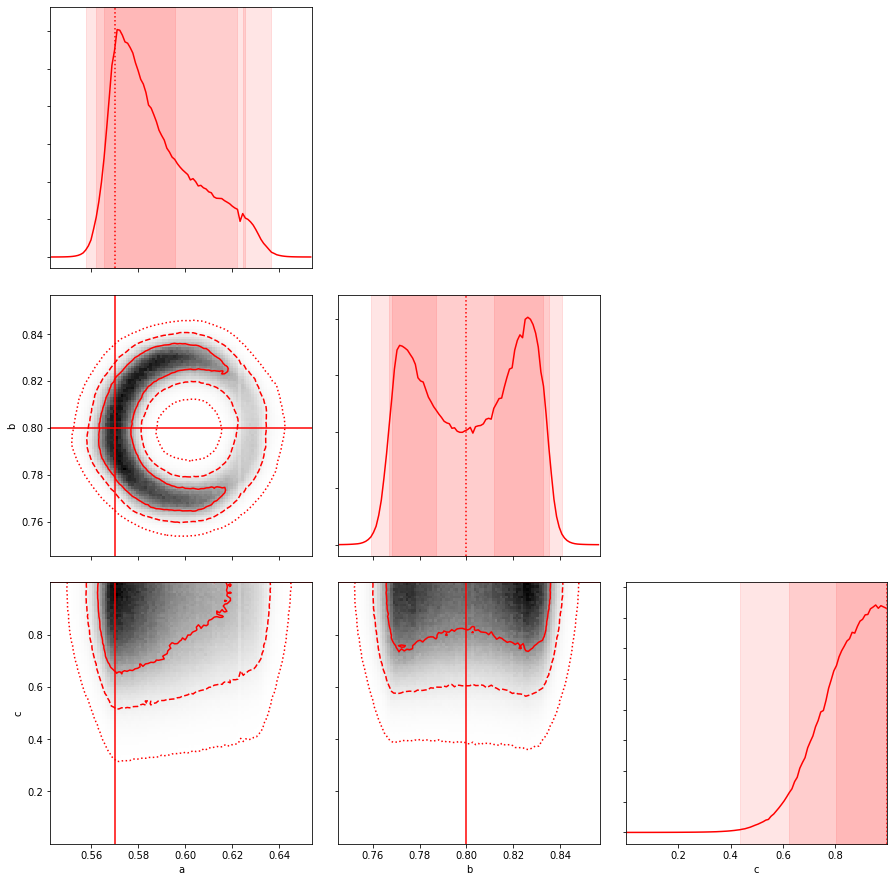

In [31]:
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 8
Adding 185 new samples. Run simulator!


Simulate: 100%|██████████| 185/185 [00:00<00:00, 772.18it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.0363715420598565
Validation loss: 5.900094934131788
Validation loss: 5.864466107409934
Validation loss: 5.734753556873487
Validation loss: 5.759936032087906
Total epochs: 5
LR iteration 1
Validation loss: 5.752055520596712
Validation loss: 5.75408909631812
Total epochs: 2
LR iteration 2
Validation loss: 5.664880897687829
Validation loss: 5.540085605953051
Validation loss: 5.614759497020556
Total epochs: 3


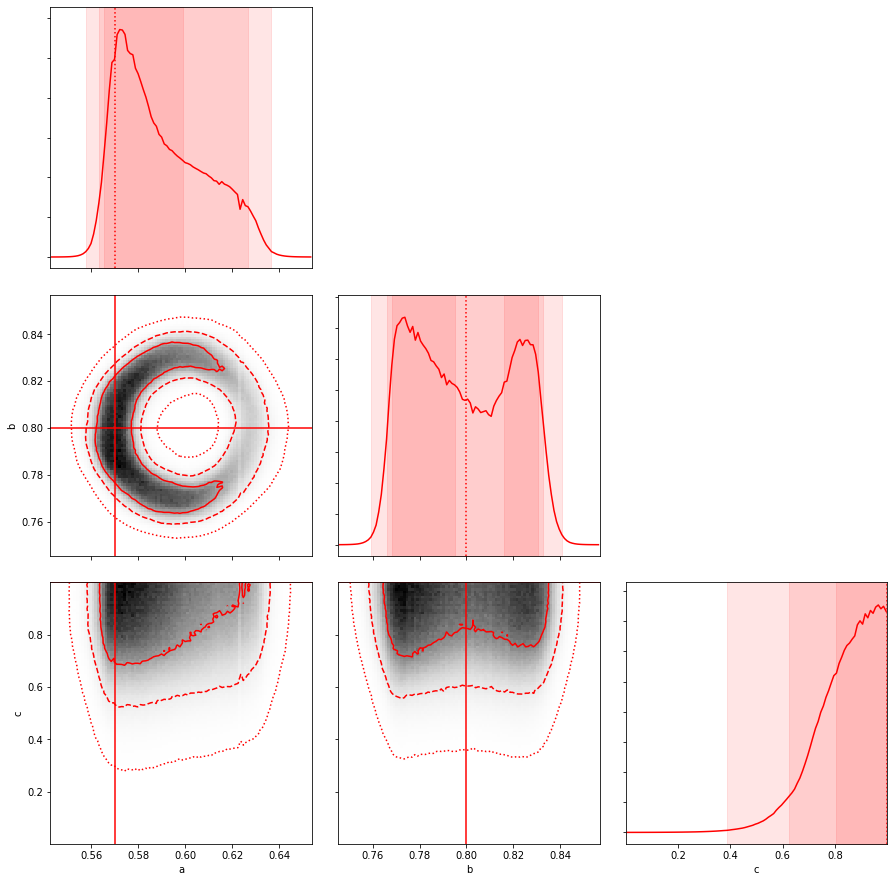

In [32]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.1, n_tail_features = 3, tail_features = False))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 9
Adding 35 new samples. Run simulator!


Simulate: 100%|██████████| 35/35 [00:00<00:00, 750.03it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.01278014805006
Validation loss: 5.85280662515889
Validation loss: 5.736437097839687
Validation loss: 5.705436963102092
Validation loss: 5.77819571028585
Total epochs: 5
LR iteration 1
Validation loss: 5.6739323838897375
Validation loss: 5.662519123243249
Validation loss: 5.593553885169651
Validation loss: 5.559405210225479
Validation loss: 5.582171660402547
Total epochs: 5
LR iteration 2
Validation loss: 5.642982288547184
Validation loss: 5.545851406843766
Validation loss: 5.608320575693379
Total epochs: 3


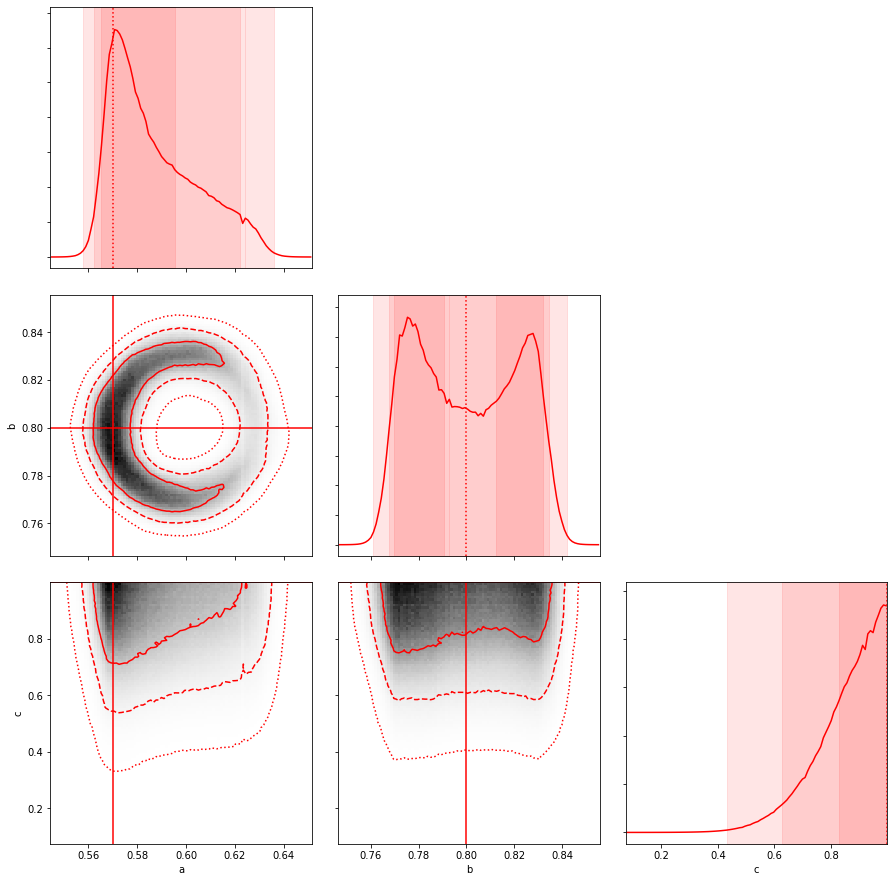

In [33]:
s.infer2d(N = 15000, train_args = dict(batch_size=16), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 10
Adding 1775 new samples. Run simulator!


Simulate: 100%|██████████| 1775/1775 [00:02<00:00, 805.92it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.273292334183402
Validation loss: 6.064091703166133
Validation loss: 5.870135701220969
Validation loss: 6.013923147450322
Total epochs: 4
LR iteration 1
Validation loss: 5.766150578208592
Validation loss: 5.795838729194973
Total epochs: 2
LR iteration 2
Validation loss: 5.712239327638046
Validation loss: 5.698407587797745
Validation loss: 5.7227151497550635
Total epochs: 3


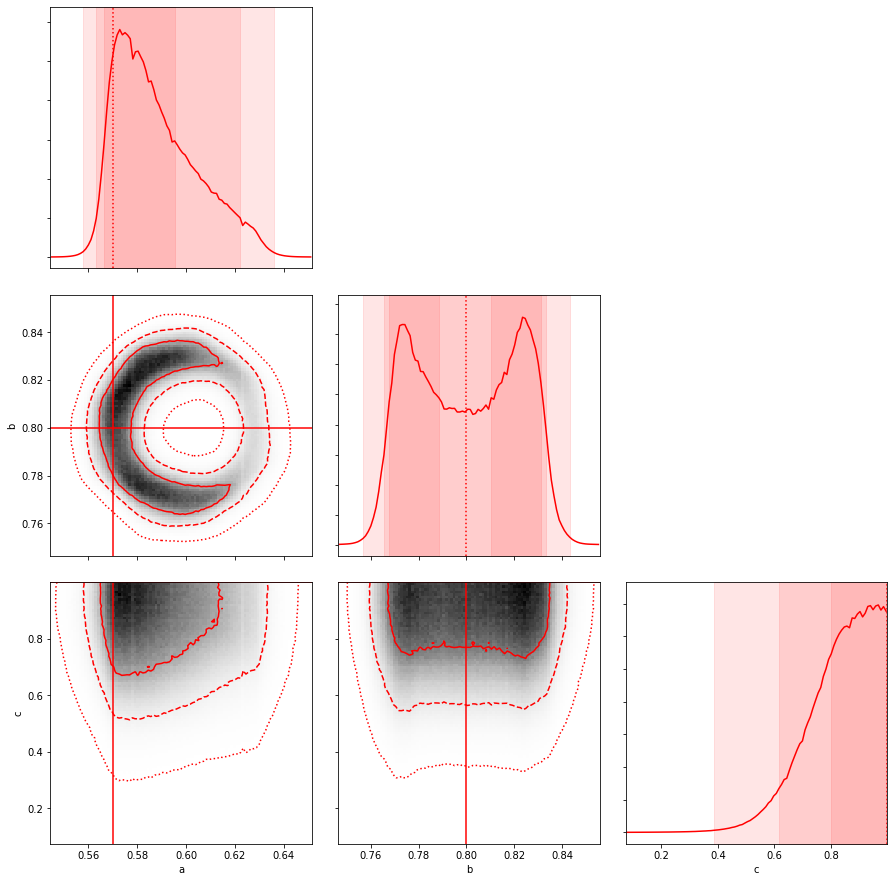

In [34]:
s.infer2d(N = 15000, train_args = dict(batch_size=64), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 11
Adding 80 new samples. Run simulator!


Simulate: 100%|██████████| 80/80 [00:00<00:00, 773.72it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.2450052862582
Validation loss: 6.075124315593554
Validation loss: 5.943603401598723
Validation loss: 5.950650453567505
Total epochs: 4
LR iteration 1
Validation loss: 5.841374189957328
Validation loss: 5.77499883071236
Validation loss: 5.850599423698757
Total epochs: 3
LR iteration 2
Validation loss: 5.767501457877781
Validation loss: 5.736097366913505
Validation loss: 5.713017411853956
Validation loss: 5.763268232345581
Total epochs: 4


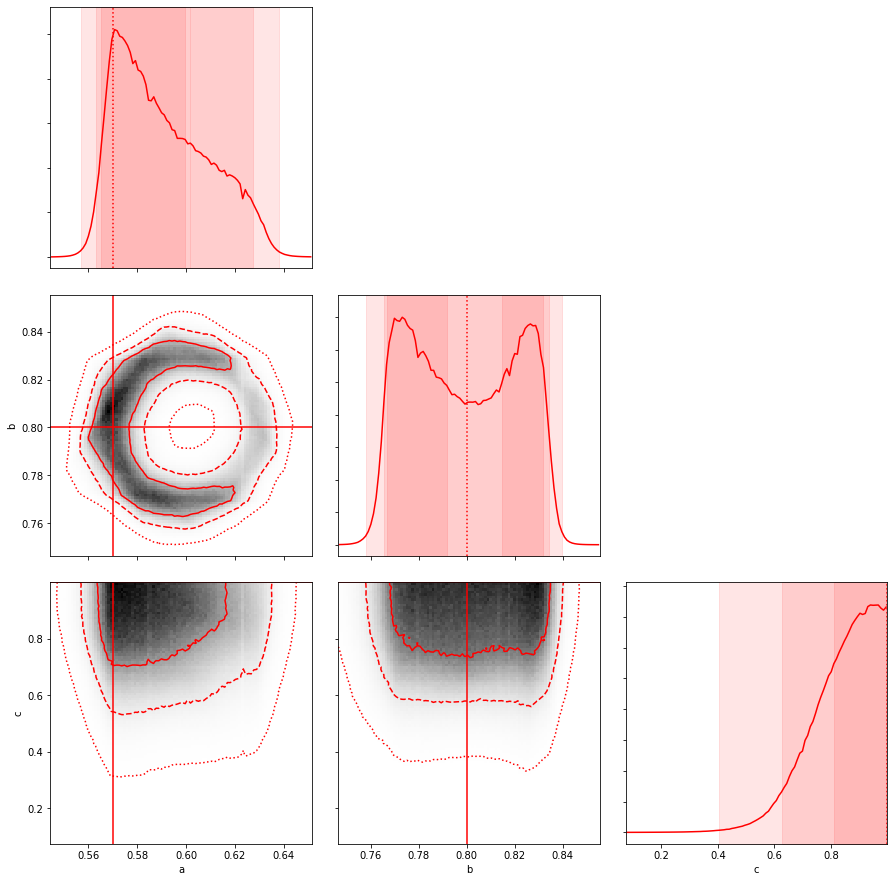

In [35]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[128,128,128]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 12
Adding 63 new samples. Run simulator!


Simulate: 100%|██████████| 63/63 [00:00<00:00, 793.81it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.447055153224779
Validation loss: 6.092025228168653
Validation loss: 6.059541391289753
Validation loss: 5.879420860953953
Validation loss: 6.007197888001151
Total epochs: 5
LR iteration 1
Validation loss: 6.034229506617007
Validation loss: 5.90291278258614
Validation loss: 5.910278745319532
Total epochs: 3
LR iteration 2
Validation loss: 5.947594124337901
Validation loss: 5.78691844318224
Validation loss: 5.831192006235537
Total epochs: 3


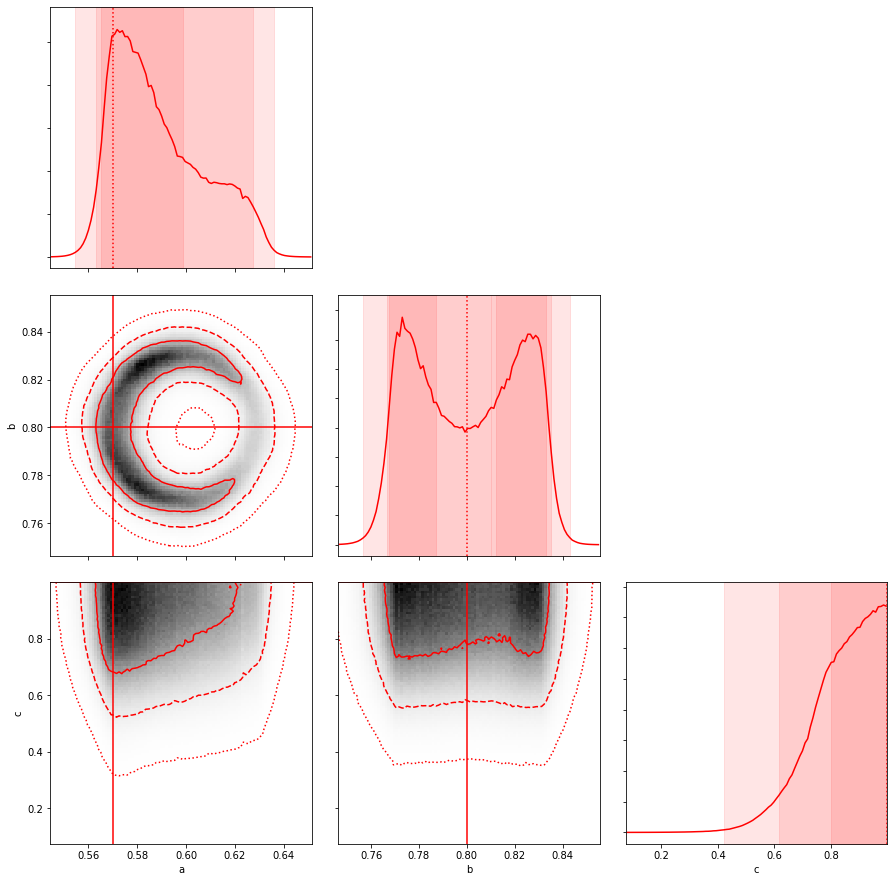

In [36]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[256,256]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 13
Adding 5 new samples. Run simulator!


Simulate: 100%|██████████| 5/5 [00:00<00:00, 698.96it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.244372865428096
Validation loss: 5.9959605051123575
Validation loss: 5.902683838554051
Validation loss: 5.9358656613723095
Total epochs: 4
LR iteration 1
Validation loss: 5.796729792719302
Validation loss: 5.832623108573582
Total epochs: 2
LR iteration 2
Validation loss: 5.7966926408850625
Validation loss: 5.867162559343421
Total epochs: 2


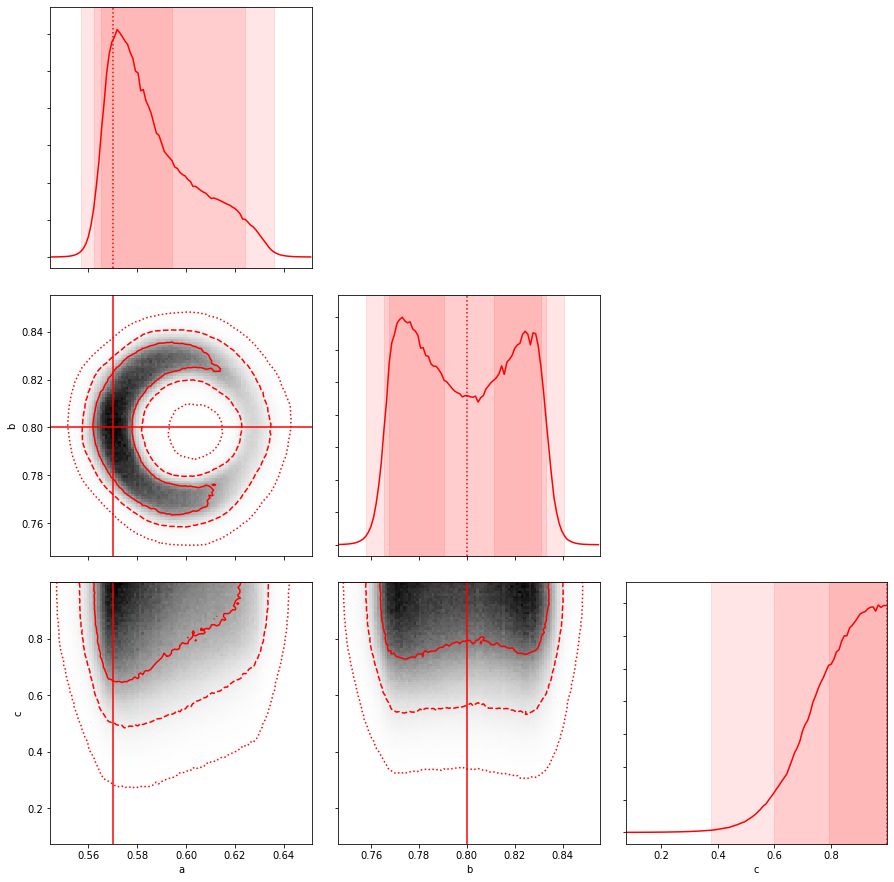

In [37]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.2, n_tail_features = 3, tail_features = False))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 14
Adding 3 new samples. Run simulator!


Simulate: 100%|██████████| 3/3 [00:00<00:00, 660.45it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.033602559048196
Validation loss: 5.943465543829876
Validation loss: 5.97344272033028
Total epochs: 3
LR iteration 1
Validation loss: 5.8292128521463145
Validation loss: 5.776195422462795
Validation loss: 5.807993339455646
Total epochs: 3
LR iteration 2
Validation loss: 5.780020983322807
Validation loss: 5.760282464649366
Validation loss: 5.823162369106127
Total epochs: 3


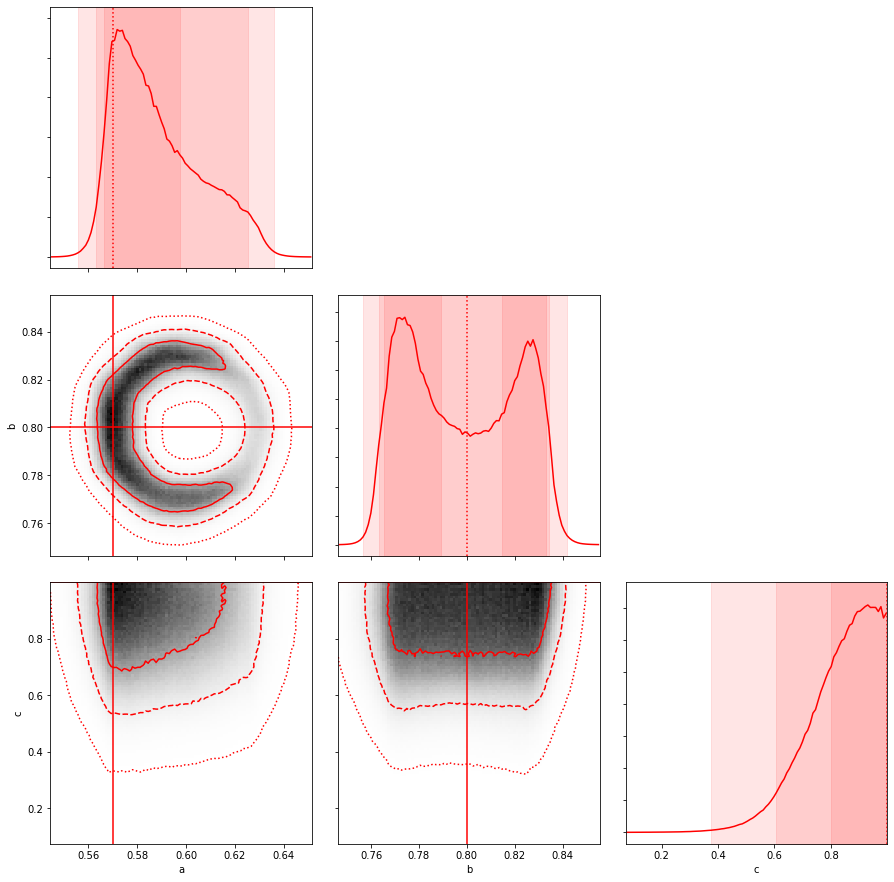

In [38]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[128,128,128]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 15
Adding 51 new samples. Run simulator!


Simulate: 100%|██████████| 51/51 [00:00<00:00, 794.07it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.323551768841951
Validation loss: 6.102320650349492
Validation loss: 5.973391605460125
Validation loss: 5.968431203261666
Validation loss: 5.896966239680415
Validation loss: 5.881148027337116
Validation loss: 5.800829566043356
Validation loss: 5.807030086931975
Total epochs: 8
LR iteration 1
Validation loss: 5.758125927137292
Validation loss: 5.755368947982788
Validation loss: 5.854580723721048
Total epochs: 3
LR iteration 2
Validation loss: 5.845099075980809
Validation loss: 5.684401242629342
Validation loss: 5.799546044805775
Total epochs: 3


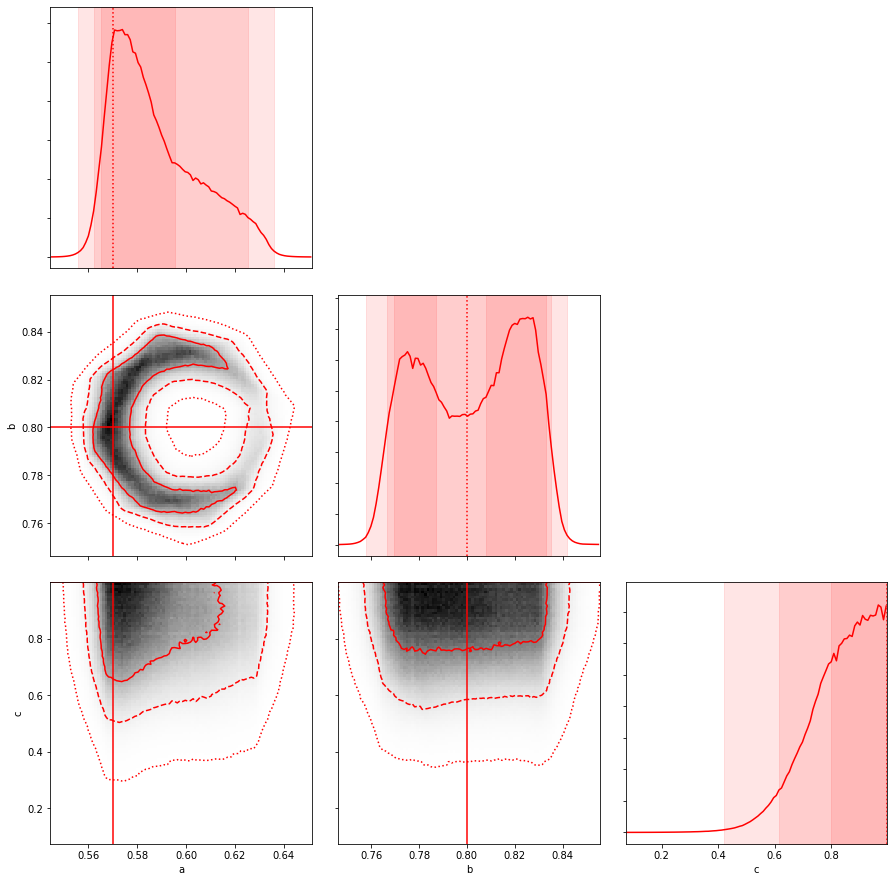

In [39]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[64,64,64]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 16
Adding 4 new samples. Run simulator!


Simulate: 100%|██████████| 4/4 [00:00<00:00, 668.49it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.1447550524836005
Validation loss: 6.083747252174046
Validation loss: 6.047936833423117
Validation loss: 5.970867260642674
Validation loss: 5.931445277255515
Validation loss: 5.843784653622171
Validation loss: 5.912045250768247
Total epochs: 7
LR iteration 1
Validation loss: 5.868480443954468
Validation loss: 5.877699623937192
Total epochs: 2
LR iteration 2
Validation loss: 5.879652748937192
Validation loss: 5.887062217878259
Total epochs: 2


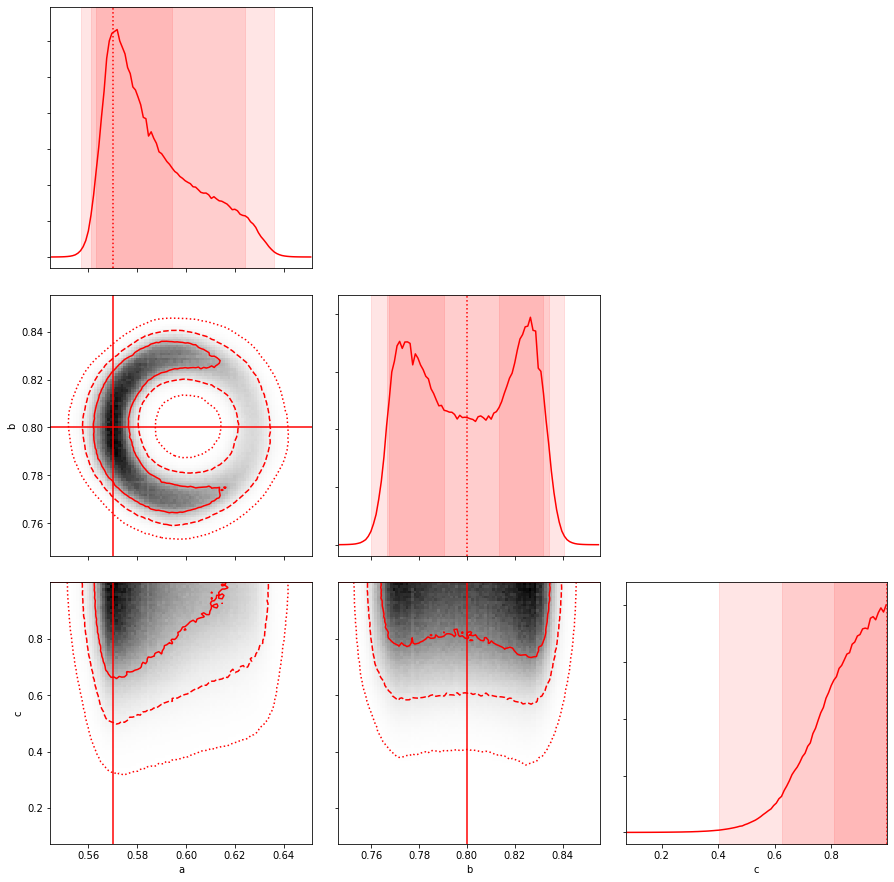

In [40]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[512,512,512]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 17
Adding 3 new samples. Run simulator!


Simulate: 100%|██████████| 3/3 [00:00<00:00, 651.73it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.14126673988674
Validation loss: 5.960266880367113
Validation loss: 5.849004963169927
Validation loss: 5.819547186727109
Validation loss: 5.770028300907301
Validation loss: 5.807647767274276
Total epochs: 6
LR iteration 1
Validation loss: 5.734302147575047
Validation loss: 5.7051640593487285
Validation loss: 5.734312420305998
Total epochs: 3
LR iteration 2
Validation loss: 5.686361914095671
Validation loss: 5.707194525262584
Total epochs: 2


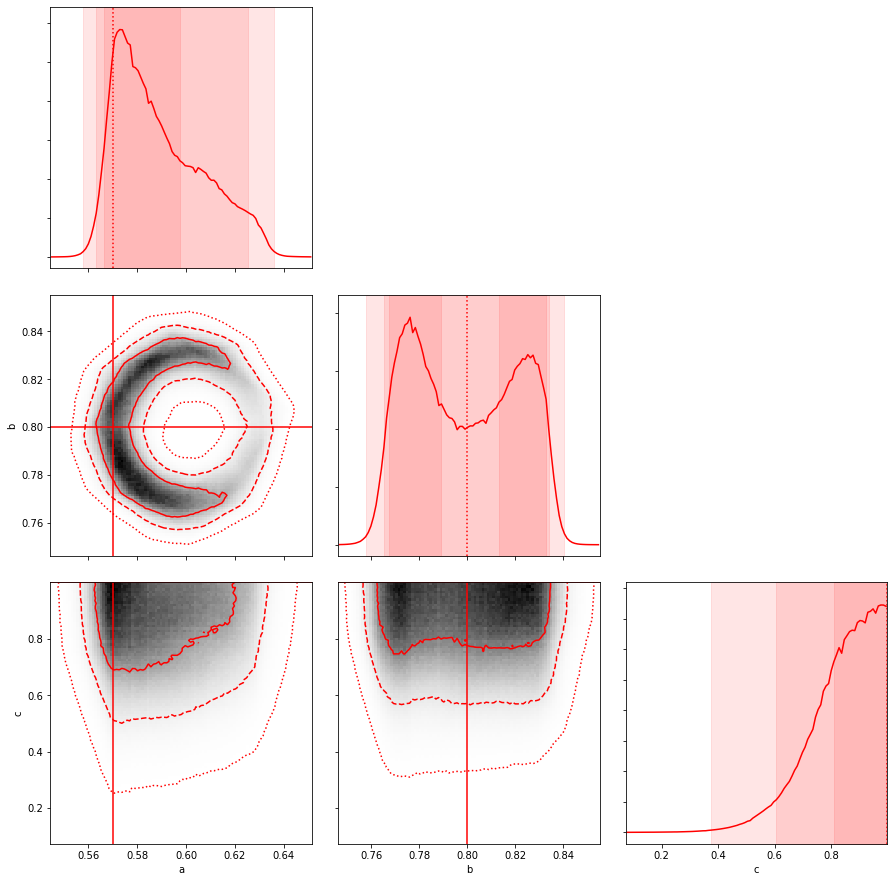

In [41]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[64, 64, 64, 64]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 18
Adding 1 new samples. Run simulator!


Simulate: 100%|██████████| 1/1 [00:00<00:00, 503.22it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.254498948221621
Validation loss: 6.129710684651914
Validation loss: 5.9424021036728565
Validation loss: 6.042093473932018
Total epochs: 4
LR iteration 1
Validation loss: 5.9591018220652705
Validation loss: 5.879956203958263
Validation loss: 5.8655987407850185
Validation loss: 5.904600298922995
Total epochs: 4
LR iteration 2
Validation loss: 5.813192502312038
Validation loss: 5.889919115149456
Total epochs: 2


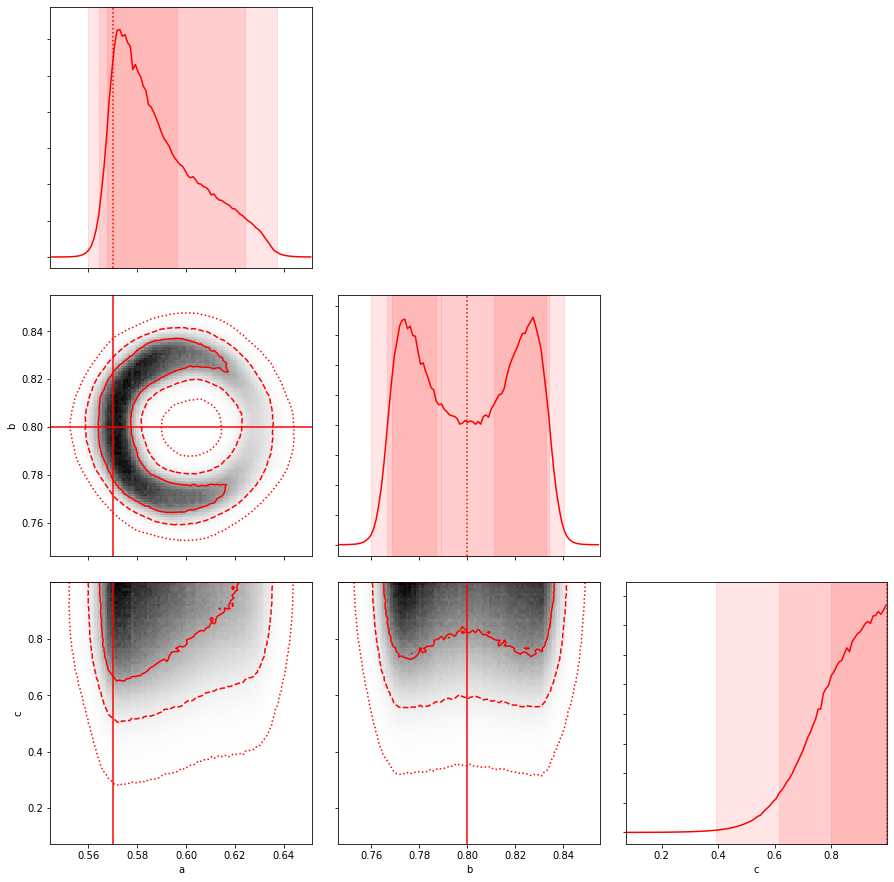

In [42]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = [0.1, 0.1, 0.], n_tail_features = 3, tail_features = False, hidden_layers=[256,256,256]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 19
Adding 4 new samples. Run simulator!


Simulate: 100%|██████████| 4/4 [00:00<00:00, 698.24it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.035088704979938
Validation loss: 5.943231862524281
Validation loss: 6.070047191951586
Total epochs: 3
LR iteration 1
Validation loss: 5.864786821862926
Validation loss: 5.882666339044985
Total epochs: 2
LR iteration 2
Validation loss: 5.772118402564007
Validation loss: 5.790028167807537
Total epochs: 2
LR iteration 3
Validation loss: 5.776304732198301
Validation loss: 5.691758383875308
Validation loss: 5.789095764574797
Total epochs: 3
LR iteration 4
Validation loss: 5.7863446422245195
Validation loss: 5.893460346304852
Total epochs: 2


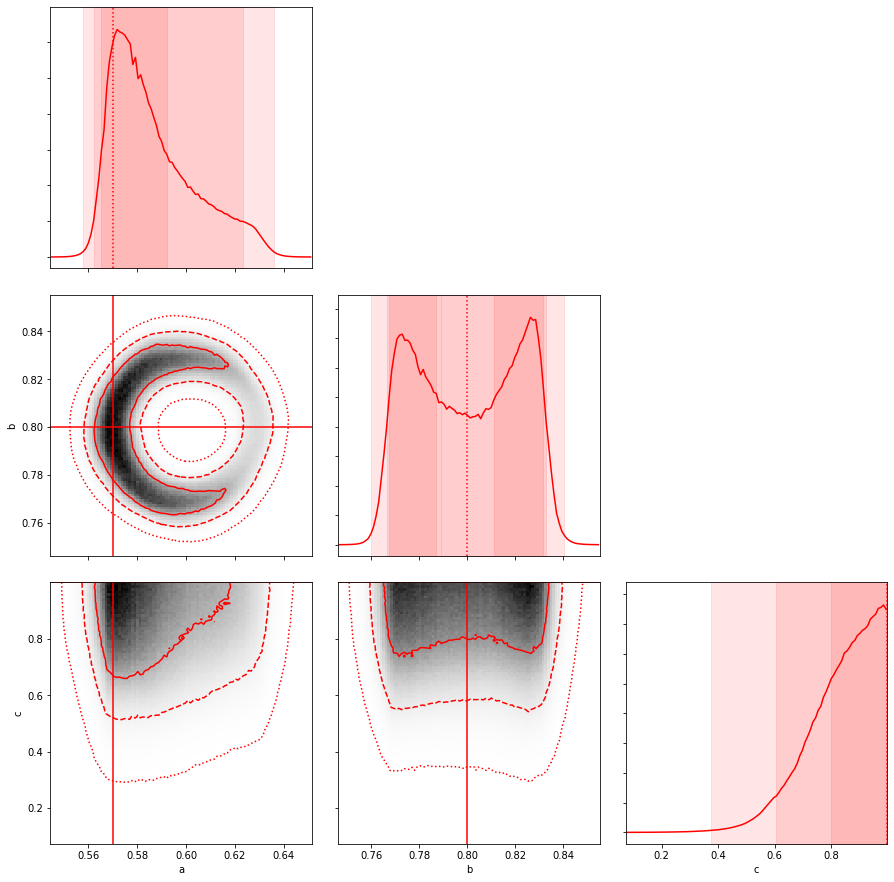

In [43]:
s.infer2d(N = 15000, train_args = dict(batch_size=32, lr_schedule=[1e-3, 3e-4, 1e-4, 3e-5, 1e-5]), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[512,512,512]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 20
Adding 1 new samples. Run simulator!


Simulate: 100%|██████████| 1/1 [00:00<00:00, 460.81it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.351653378942738
Validation loss: 6.1064035685166065
Validation loss: 5.987256226332291
Validation loss: 6.048198264578114
Total epochs: 4
LR iteration 1
Validation loss: 5.975856635881507
Validation loss: 5.990119664565377
Total epochs: 2
LR iteration 2
Validation loss: 5.982040498567664
Validation loss: 5.899354385293049
Validation loss: 5.922555363696555
Total epochs: 3


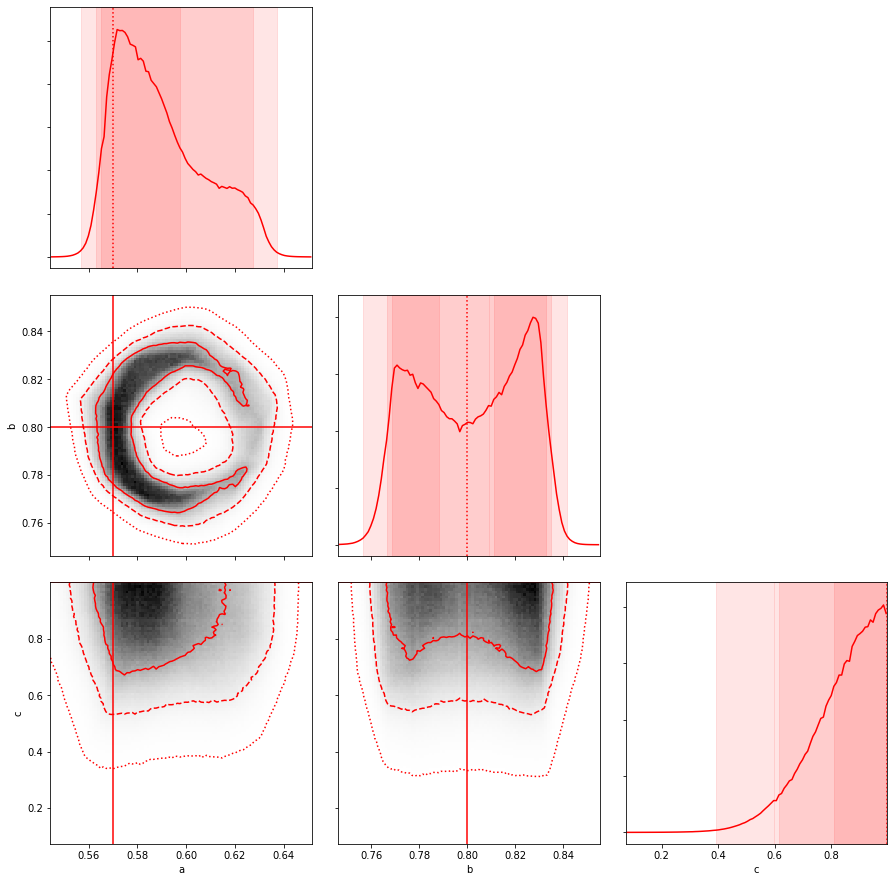

In [44]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[32, 64, 128, 256]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)

N = 15000
Round: 21
Adding 1 new samples. Run simulator!


Simulate: 100%|██████████| 1/1 [00:00<00:00, 254.77it/s]


n_features = 3
Start training
LR iteration 0
Validation loss: 6.385526263195535
Validation loss: 6.063140288643215
Validation loss: 5.914814575858738
Validation loss: 5.836745428002399
Validation loss: 5.870894276577493
Total epochs: 5
LR iteration 1
Validation loss: 5.894873764203942
Validation loss: 5.771820534830508
Validation loss: 5.788000728773034
Total epochs: 3
LR iteration 2
Validation loss: 5.821263541346011
Validation loss: 5.824060481527577
Total epochs: 2


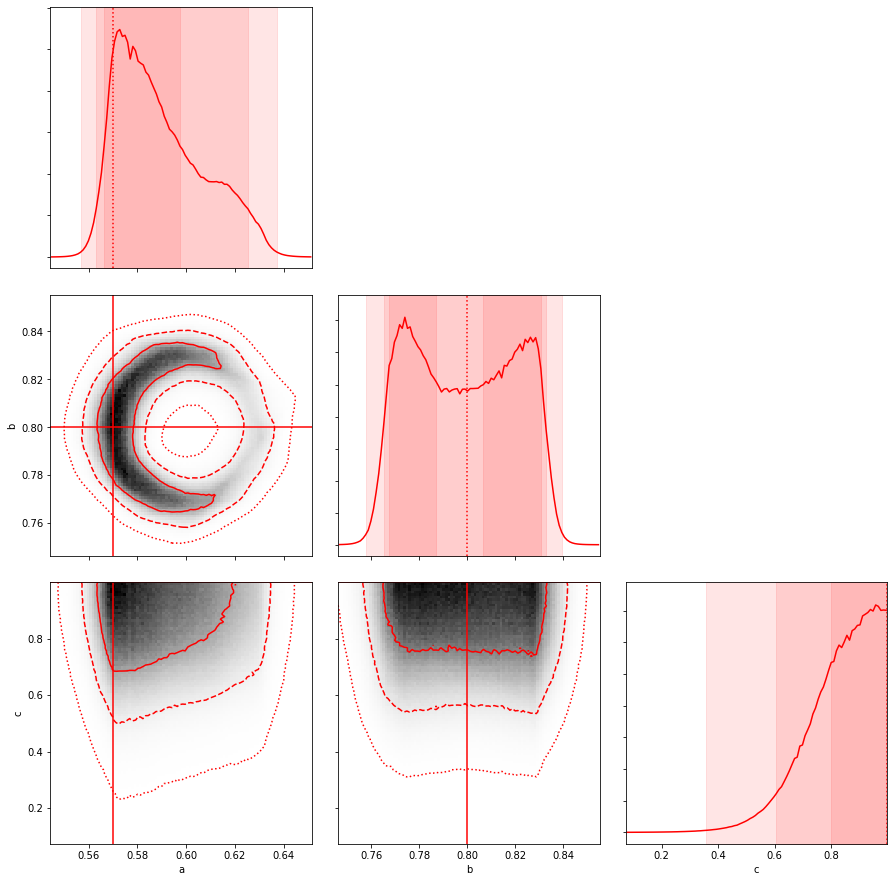

In [45]:
s.infer2d(N = 15000, train_args = dict(batch_size=32), tail_args = dict(p = 0.0, n_tail_features = 3, tail_features = False, hidden_layers=[256, 128, 64, 32]))
post = s.posteriors(n_samples = 10000000)
swyft.corner(post, ["a", "b", "c"], color='r', figsize = (15,15), truth=par0)